## Real or Not? NLP with Disaster Tweets

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).


#### Data Description
id - a unique identifier for each tweet <br>
text - the text of the tweet<br>
location - the location the tweet was sent from (may be blank)<br>
keyword - a particular keyword from the tweet (may be blank)<br>
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)<br>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the train and test datasets into respective dataframes with read_csv function
df = pd.read_csv('../input/nlp-getting-started/train.csv')
df_test = pd.read_csv("../input/nlp-getting-started/test.csv")

In [3]:
#To display maximum column width
pd.set_option('display.max_colwidth',None)

## DATA UNDERSTANDING

In [4]:
#Observing the first few records of the train dataset
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [5]:
#Checking the dimension of the train and test datasets
print(df.shape)
print(df_test.shape)

(7613, 5)
(3263, 4)


In [6]:
#Basic information on the dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


We can see from the dataset that there are 7613 records in total in the train dataset wherein some columns are having NULL values present within.<br>
Also, the columns keyword,location and text are of object type<br>
We can go ahead and find out the count of NULL values for each column

In [7]:
#NULL count in train and test
print(df.isnull().sum())
print(df_test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


Location is one column which is having many missing values in both train and test. The text column which we are interested in, is having no NULL values.

In [8]:
#Initial statistics for the columns
#We will see describe function even for the object column, so that we can get some pointers on duplicate values.
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


We can see the unique count of text column to be 7503 which means there are some duplicate tweet records present within. We can address this issue at a later point of time.<br>
Onto EDA!!

## EXPLORATORY DATA ANALYSIS

In [9]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


### Balanced or Imbalanced?

In [10]:
#count for each category target
#Target 1 stands for real disaster and 0 stands for any other tweets
classes = df['target'].value_counts()
classes

0    4342
1    3271
Name: target, dtype: int64

In [11]:
#Creating a simple dataframe with percentage of each class
class_0 = classes[0]/df['target'].count()*100
class_1 = classes[1]/df['target'].count()*100
dist_df = pd.DataFrame({'Percentage':[class_0,class_1]},index=['Normal_Tweets','Disaster_Tweets'])
dist_df

,Percentage
Normal_Tweets,57.034021
Disaster_Tweets,42.965979


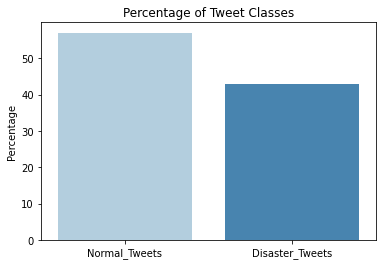

In [12]:
#Barplot for the classes
plt.title("Percentage of Tweet Classes")
sns.barplot(x=dist_df.index,y=dist_df['Percentage'],palette='Blues')
plt.show()

We can see the train dataset is almost balanced, with almost equal proportion of tweets from either classes.

We know from the data description that `Keyword` is a particular important word from the tweet. Hence we can observe this column to understand the possible tweet mentions. We can see the top few most often listed keywords.

In [13]:
df['keyword'].value_counts()[:10]

fatalities     45
deluge         42
armageddon     42
sinking        41
harm           41
damage         41
body%20bags    41
collided       40
windstorm      40
twister        40
Name: keyword, dtype: int64

Some or all of these words looks like real disaster mentions. Maybe what we can do is creating separate dataframes for disaster/non-disaster tweets and then observing the mostly mentioned keywords.

In [14]:
df_not_disaster = df.loc[df['target']==0]
df_disaster = df.loc[df['target']==1]

In [15]:
#Top 10 keywords in the disaster tweets
df_disaster['keyword'].value_counts()[:10]

wreckage             39
outbreak             39
derailment           39
oil%20spill          37
debris               37
typhoon              37
evacuated            32
suicide%20bomb       32
rescuers             32
suicide%20bombing    32
Name: keyword, dtype: int64

In [16]:
#Top 10 keywords in the other tweets
df_not_disaster['keyword'].value_counts()[:10]

body%20bags    40
armageddon     37
harm           37
wrecked        36
ruin           36
deluge         36
explode        35
siren          35
fear           35
twister        35
Name: keyword, dtype: int64

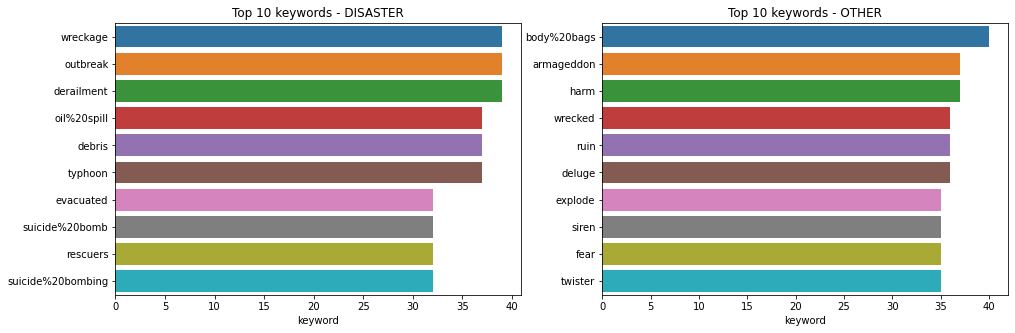

In [17]:
#Barplots for the above
#Interpretation is always easier with the plots
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.xlabel('Mentions')
plt.title('Top 10 keywords - DISASTER')
sns.barplot(y=df_disaster['keyword'].value_counts()[:10].index,x=df_disaster['keyword'].value_counts()[:10])
plt.subplot(122)
plt.xlabel('Mentions')
plt.title('Top 10 keywords - OTHER')
sns.barplot(y=df_not_disaster['keyword'].value_counts()[:10].index,x=df_not_disaster['keyword'].value_counts()[:10])
plt.show()

An interesting thing what we can observe here is even for tweets not mentioned as disaster, there are some keywords like fear,siren,explode being used. Maybe these words are used in a sarcastic or funny context.

We can now see about the location from which these tweets are posted.

In [18]:
#Top 10 locations based on the count
df['location'].value_counts()[:10]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

Most number of tweets in the dataset are from USA. But interestingly, there are some issues with this column, where we can a different mention of Unites states and also some cities listed seperately and not adding to the tally of the country.<br> We have also seen a huge amount of missing values also for this column.<br> Since our primary goal is around the text field, we can shift our focus from this, otherwise should have handled.

#### TWEET LENGTH - DISASTER AND NORMAL

We can now see some of the characteristics related to the tweet length

In [19]:
#Maximum Tweet Length
df['text'].str.len().max()

157

In [20]:
#Tweet with maximum length present in the train set
df.loc[df['text'].str.len()==df['text'].str.len().max()]['text']

1270    when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????
Name: text, dtype: object

In [21]:
#Minimum Tweet length
df['text'].str.len().min()

7

In [22]:
df.loc[df['text'].str.len()==df['text'].str.len().min()]

,id,keyword,location,text,target
1882,2703,crushed,NaN,Crushed,0
4890,6962,massacre,NaN,Bad day,0
5115,7295,nuclear%20reactor,NaN,Err:509,0


In [23]:
#Average tweet length
df['text'].str.len().mean()

101.03743596479706

The average Tweet length seems to be around 101 characters.

In [24]:
#Average Word length of the tweet of our train corpus
df['text'].str.split().apply(lambda x: len(x)).mean()

14.903585971364771

In [25]:
#Average Word length of the tweet for seperate Disaster and other set
wl_not_disaster = df_not_disaster['text'].str.split().apply(lambda x: len(x))
wl_disaster = df_disaster['text'].str.split().apply(lambda x: len(x))
print(wl_not_disaster.mean())
print(wl_disaster.mean())

14.704744357438969
15.167532864567411


In [26]:
#Tweets with maximum word count in our train set
df.loc[df['text'].str.split().apply(lambda x: len(x))==df['text'].str.split().apply(lambda x: len(x)).max()]

,id,keyword,location,text,target
954,1381,body%20bag,NaN,If you have a son or a daughter would you like to see them going to a war with Iran and come back in a body bag? Let the #Republicans know,0
4432,6305,hostage,NaN,When u get mugged with ur gf u come up with the best excuses not to look like a bitch 'I wanted to fight but what if he held u hostage?',0
5005,7138,military,NaN,I remember when I worked at Mcdonalds I use to be hours late because we used military time and I use to mess up when I had to be there :/,0


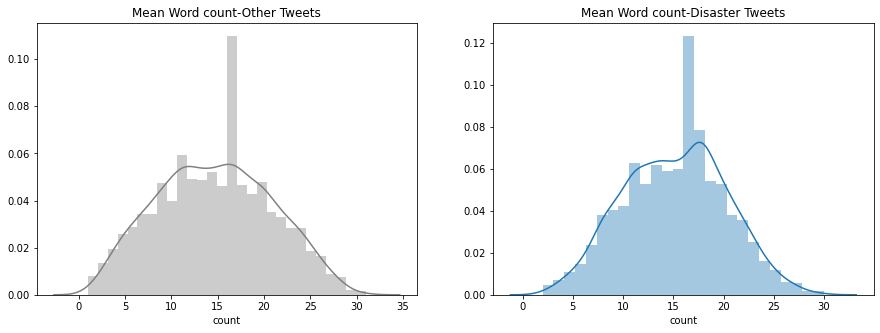

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Mean Word count-Other Tweets")
sns.distplot(wl_not_disaster.map(lambda x: np.mean(x)),color='grey')
plt.xlabel('count')
plt.subplot(122)
plt.title("Mean Word count-Disaster Tweets")
sns.distplot(wl_disaster.map(lambda x: np.mean(x)))
plt.xlabel('count')
plt.show()

## LEXICAL PROCESSING

So as we have said earlier, we are interested in the text column here, which contains the actualy tweets. There can be possible cleanliness issues in the text. Maybe some links attached, some hashtags and any other issues which needs to be address. We can try observing the same now.

In [28]:
#Trying to find if there are tweets present with a web link.
df.loc[df['text'].str.contains('http')]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1
...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site mosque - Reuters via World - Google News - Wall ... http://t.co/nF4IculOje,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1


Oops thats a huge number - 3971 tweets of our train contains links alongside!

In [29]:
#Trying to find if there are hashtags alongside
df.loc[df['text'].str.contains('#')]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
...,...,...,...,...,...
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Overtaking and Collided #BathAndNorthEastSomerset http://t.co/fa3FcnlN86,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been costlier bigger than projected http://t.co/5ueCmcv2Pk,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: UPDATE: FIRE crews have evacuated up to 30 passengers who were tr... http://t.co/EYSVvzA7Qm,1


Now what we can do is try build a text corpus with all the words present in these tweets. For this, we can try to pick up each tweet in the dataset break down into words and try and append into a single list.

In [30]:
def corpus_build(column):
    """Function to create a corpus list for all the words present in the tweets.Pass in the 
    dataframe column"""
    text_corpus = []
    for i in column.str.split():
        for word in i:
            text_corpus.append(word)
    return text_corpus

In [31]:
#Text_corpus for the train dataset tweets
text_corpus = corpus_build(df['text'])
#Text corpus for the test dataset tweets
text_corpus_test = corpus_build(df_test['text'])

In [32]:
#Total Number of words present in the tweets
len(text_corpus)

113461

Now what we have to keep in mind is that there are words which would be used more than once with different tweets. Also, there can be many stopwords present with the tweets which doesnt add any value to the actual meaning of the sentence, but rather can be seen as just sentence builder/connectors.

In [33]:
#Importing the stopwords
from nltk.corpus import stopwords

In [34]:
#We can see the stopwords listed with this.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

These words as you can observe, needs to be removed since doesnt provide any value adds. Before removing such words if any from our tweets, we can run a quick check for this as well.

In [35]:
#Count of stopwords present in our tweets
corpus_stopwords = {}
for word in text_corpus:
    if word in stopwords.words('english'):
        if word in corpus_stopwords:
            corpus_stopwords[word] += 1
        else:
            corpus_stopwords.update({word: 1})
corpus_stopwords

{'are': 345,
 'the': 2575,
 'of': 1722,
 'this': 335,
 'all': 178,
 'to': 1805,
 'in': 1757,
 'being': 67,
 'by': 469,
 'other': 31,
 'or': 181,
 'from': 372,
 'as': 282,
 'into': 162,
 'a': 1845,
 'both': 20,
 'on': 773,
 'and': 1302,
 'can': 141,
 'an': 204,
 'now': 101,
 'that': 492,
 'is': 814,
 'our': 72,
 'so': 239,
 'up': 250,
 'my': 549,
 'you': 632,
 'out': 226,
 'for': 820,
 'me': 244,
 'but': 250,
 'they': 145,
 'will': 210,
 'these': 40,
 "you're": 56,
 'with': 508,
 'not': 236,
 'your': 254,
 'was': 363,
 'have': 353,
 'them': 71,
 'at': 485,
 'before': 44,
 'has': 229,
 'it': 433,
 'while': 48,
 'be': 371,
 'if': 143,
 'yours': 18,
 'about': 192,
 'their': 85,
 'here': 47,
 'what': 120,
 'does': 25,
 "don't": 128,
 "it's": 115,
 'than': 132,
 'how': 111,
 "didn't": 22,
 'we': 149,
 'some': 88,
 'over': 158,
 'when': 181,
 'him': 48,
 "you've": 6,
 'been': 185,
 'there': 91,
 'more': 128,
 'were': 99,
 'only': 69,
 'had': 95,
 'who': 150,
 'himself': 7,
 'further': 2,
 'on

In [36]:
#We will try to sort this words in terms of frequency - higher to lower and find out top10 frequent stopwords
corpus_stopwords_sorted = sorted(corpus_stopwords.items(),key=lambda x:x[1],reverse=True)

In [37]:
corpus_stopwords_10 = corpus_stopwords_sorted[:10]
corpus_stopwords_10

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('you', 632)]

In [38]:
keys = []
values = []
for i in corpus_stopwords_10:
    keys.append(i[0])
    values.append(i[1])

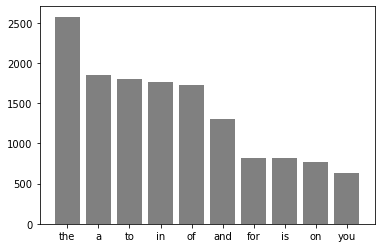

In [39]:
#Plotting the top appearing stopwords and their corresponding frequency
plt.bar(keys,values,color='grey')
plt.show()

In [40]:
# The top appearing stopwords in our corpus are -
keys

['the', 'a', 'to', 'in', 'of', 'and', 'for', 'is', 'on', 'you']

NOW BACK TO BUSINESS!!!

We are having a basic idea now, about things to be taken care of as part of Data Cleaning or Text preprocessing here - 
1. Removing the Website Links present within the tweets
2. Removing Hash associated with hashtags or any special character present with the tweets
3. Converting all text into either a single case - either Lower or Upper
4. Removing Line Breaks if any
5. Tokenization
6. Handling the stopwords
7. Stemming/Lemmatization

### 1.Removing the Website Links

In [41]:
#Example tweet with link present. We will try to check function on this
link ="Link to Regex basics - https://www.w3schools.com/python/python_regex.asp"

In [42]:
#Importing the regular expression function
import re

In [43]:
#Function to remove the links in the text
def remove_url(input):
    """Function to remove the URLs present in the text. Feed in the text data as input to function"""
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',input)

In [44]:
remove_url(link)

'Link to Regex basics - '

In [45]:
#Some of the records with urls before our process
df.iloc[31:34]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1


In [46]:
df['text'] = df['text'].apply(remove_url)
df_test['text'] = df_test['text'].apply(remove_url)

In [47]:
#After url removal
df.iloc[31:34]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,1


### 2. Removing Hashes and other punctuation

In [48]:
#Importing the String module
import string

In [49]:
#Python provides a constant called string.punctuation that provides a great list of punctuation characters. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [50]:
def remove_punctuation(input1):
    """To remove all the punctuations present in the text. Input the text to the function"""
    table = str.maketrans('','',string.punctuation)
    return input1.translate(table)

In [51]:
#Some of the records with hash before our process
df.iloc[3:6]

,id,keyword,location,text,target
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1


In [52]:
df['text'] = df['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [53]:
#After Punctuation removal
df.iloc[3:6]

,id,keyword,location,text,target
3,6,NaN,NaN,13000 people receive wildfires evacuation orders in California,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1
5,8,NaN,NaN,RockyFire Update California Hwy 20 closed in both directions due to Lake County fire CAfire wildfires,1


### 3. Converting all text to Lower

In [54]:
#Converting text column to all lowercase
df['text'] = df['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

### 4. Removing Line Breaks

In [55]:
df.loc[df['text'].str.contains("\n")][:5]

,id,keyword,location,text,target
41,61,ablaze,NaN,on the outside youre ablaze and alive\nbut youre dead inside,0
51,74,ablaze,India,man wife get six years jail for setting ablaze niece\n,1
61,86,ablaze,Inang Pamantasan,progressive greetings\n\nin about a month students would have set their pens ablaze in the torch publications,0
80,117,accident,NaN,mom we didnt get home as fast as we wished \nme why is that\nmom there was an accident and some truck spilt mayonnaise all over,0
103,149,aftershock,304,the man who can drive himself further once the effort gets painful is the man who will win \nroger bannister,0


We can find that there are some line breaks present in different tweets which we will try removing.

In [56]:
def remove_linebreaks(input1):
    """Function to remove the line breaks  present in the text. Feed in the text data as input to function"""
    text = re.compile(r'\n')
    return text.sub(r' ',input1)

In [57]:
df['text'] = df['text'].apply(remove_linebreaks)
df_test['text'] = df_test['text'].apply(remove_linebreaks)

### 5. Tokenization

Tokenization is a technique used to split the text into smaller elements, which can be either words,sentences or even paragraphs.<br>
Rather than using split() function to tokenize these tweets to words, we can try use any nltk tokenizers.<br>

In [58]:
#Importing the word_tokenize
from nltk.tokenize import word_tokenize

In [59]:
#We can tokenize all the tweets using word_tokenize
df['text'] = df['text'].apply(word_tokenize)
df_test['text'] = df_test['text'].apply(word_tokenize)

In [60]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]",1
3,6,NaN,NaN,"[13000, people, receive, wildfires, evacuation, orders, in, california]",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]",1


### 6. Stopwords Removal

In [61]:
def remove_stopwords(input1):
    """Function to remove the stopwords present in the text. Feed in the text data as input to function"""
    words = []
    for word in input1:
        if word not in stopwords.words('english'):
            words.append(word)
    return words

In [62]:
df['text']=df['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)

In [63]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive, us]",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]",1
3,6,NaN,NaN,"[13000, people, receive, wildfires, evacuation, orders, california]",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]",1
5,8,NaN,NaN,"[rockyfire, update, california, hwy, 20, closed, directions, due, lake, county, fire, cafire, wildfires]",1
6,10,NaN,NaN,"[flood, disaster, heavy, rain, causes, flash, flooding, streets, manitou, colorado, springs, areas]",1
7,13,NaN,NaN,"[im, top, hill, see, fire, woods]",1
8,14,NaN,NaN,"[theres, emergency, evacuation, happening, building, across, street]",1
9,15,NaN,NaN,"[im, afraid, tornado, coming, area]",1


If you observe the tweets now, we can see we have got a cleaner version now and all tweets represented with just keywords only now. <br>
But you can also observe some other issues as well <br>
Say for example - see the 6th row; flood-flooding represents a single word which can be handled by techniques like Stemming and Lemmatization.<br>
It is always better to make sure different variations of a word to be represented by a single word hence maintaining the needed importance of the word. <br> These methods are part of token normalisation.

### 7. Stemming and Lemmatization

Both Stemming and Lemmatization are almost same, but there is some difference between them.<br>
Stemming is a rule based technique which chops off the suffix of the word to get root form.<br>
Popular Stemmers -> `Porter Stemmer` and `Snowball Stemmer`<br>
Lemmarization searches for base word or lemma by recursively going through all the variations of dictionary words.
Popular Lemmatizer -> `WordNet Lemmatizer`

We will observe the difference between these and select the appropriate one for this scenario.

In [64]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [65]:
def lemma_wordnet(input1):
    """Lemmatization function"""
    return [lem.lemmatize(w) for w in input1]

In [66]:
df['text'].apply(lemma_wordnet)[:10]

0                                                        [deed, reason, earthquake, may, allah, forgive, u]
1                                                             [forest, fire, near, la, ronge, sask, canada]
2         [resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]
3                                         [13000, people, receive, wildfire, evacuation, order, california]
4                                          [got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]
5    [rockyfire, update, california, hwy, 20, closed, direction, due, lake, county, fire, cafire, wildfire]
6           [flood, disaster, heavy, rain, cause, flash, flooding, street, manitou, colorado, spring, area]
7                                                                          [im, top, hill, see, fire, wood]
8                                       [there, emergency, evacuation, happening, building, across, street]
9                           

In [67]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [68]:
def stemming_porter(input1):
    """Stemming using Porter Stemmer"""
    return [stemmer.stem(w) for w in input1]

In [69]:
df['text'].apply(stemming_porter)[:10]

0                                                 [deed, reason, earthquak, may, allah, forgiv, us]
1                                                      [forest, fire, near, la, rong, sask, canada]
2                 [resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]
3                                         [13000, peopl, receiv, wildfir, evacu, order, california]
4                                    [got, sent, photo, rubi, alaska, smoke, wildfir, pour, school]
5    [rockyfir, updat, california, hwi, 20, close, direct, due, lake, counti, fire, cafir, wildfir]
6           [flood, disast, heavi, rain, caus, flash, flood, street, manit, colorado, spring, area]
7                                                                  [im, top, hill, see, fire, wood]
8                                              [there, emerg, evacu, happen, build, across, street]
9                                                                 [im, afraid, tornado, come, area]


In [70]:
from nltk.stem.snowball import SnowballStemmer
stemmer_snowball = SnowballStemmer("english")

In [71]:
def stemming_snowball(input1):
    """Stemming using Snowball Stemmer"""
    return [stemmer_snowball.stem(w) for w in input1]

In [72]:
df['text'].apply(stemming_snowball)[:10]

0                                                 [deed, reason, earthquak, may, allah, forgiv, us]
1                                                      [forest, fire, near, la, rong, sask, canada]
2                 [resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]
3                                         [13000, peopl, receiv, wildfir, evacu, order, california]
4                                    [got, sent, photo, rubi, alaska, smoke, wildfir, pour, school]
5    [rockyfir, updat, california, hwi, 20, close, direct, due, lake, counti, fire, cafir, wildfir]
6         [flood, disast, heavi, rain, caus, flash, flood, street, manitou, colorado, spring, area]
7                                                                  [im, top, hill, see, fire, wood]
8                                              [there, emerg, evacu, happen, build, across, street]
9                                                                 [im, afraid, tornado, come, area]


Comparing all three, I guess it would be better to go with Lemmatization in our case.

In [73]:
df['text'] = df['text'].apply(lemma_wordnet)
df_test['text'] = df_test['text'].apply(lemma_wordnet)

In [74]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquake, may, allah, forgive, u]",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]",1
3,6,NaN,NaN,"[13000, people, receive, wildfire, evacuation, order, california]",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]",1


In [75]:
def combine_text(input1):
    """Function to combine the list words"""
    combined = ' '.join(input1)
    return combined

In [76]:
df['text'] = df['text'].apply(combine_text)
df_test['text'] = df_test['text'].apply(combine_text)

In [77]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer evacuation shelter place order expected,1
3,6,NaN,NaN,13000 people receive wildfire evacuation order california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pours school,1


## BAG OF WORDS VS TF-IDF

Since the data with us is in text format, there is a need to convert these appropriate inorder to feed to our ML models. Both `Bag of Words` and `TF-IDF` are ways of accomplishing these task.<br>
Bag of Words represents each document or sentence as a seperate row and with every word in the complete set of documents as a column, wherein you fill either the presence of the word in the document with a 0/1 or you fill the frequency of the word in the document, hence building up a matrix kind of representation. <br>
But the problem here with the bag of words model is that, it gives equal importance to each word, but we know that is not the case everywhere. Some words might be more important than the other, based on their usage in a single sentence/document or if it is more frequently present throughout the documents. This is taken care by TF-IDF(Term Frequency-Inverse Document Frequency) representation.<br>
TF-IDF gives more weight to those words which are present frequently in a document but are rare across other documents.

#### BAG OF WORDS REPRESENTATION

We will use CountVectorizer for this. This converts a collection of text documents to a matrix of token counts.

In [78]:
#Importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
#Object for the CountVectorizer function
vectorizer = CountVectorizer()
bow_model_train = vectorizer.fit_transform(df['text'])
bow_model_test = vectorizer.transform(df_test['text'])

In [80]:
#Complete sparse array
bow_model_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### TF-IDF REPRESENTATION

<b>Term Frequency = Frequency of a term in the document / Total terms in that document <br>
Inverse Document Frequency = log10 Total Number of Documents / Total documents that have the term

In [81]:
#Importing TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vectorizer_tfidf = TfidfVectorizer()
tfidf_model_train = vectorizer_tfidf.fit_transform(df['text'])
tfidf_model_test = vectorizer_tfidf.transform(df_test['text'])

In [83]:
#Complete sparse array
tfidf_model_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BIGRAMS

In [84]:
#CountVectorizer with ngram_range=(2,2) will give us bigrams. We will fit_transform our text column with this.
vectorizer_bigram = CountVectorizer(ngram_range=(2,2),analyzer='word')
sparse_matrix = vectorizer_bigram.fit_transform(df['text'])

In [85]:
#We are creating here a dataframe for the bigrams which shows the frequency of this bigrams
frequencies = sum(sparse_matrix).toarray()[0]
bigram_df = pd.DataFrame(frequencies,index=vectorizer_bigram.get_feature_names(),columns=['frequency'])

In [86]:
#Sorting the bigram dataframe based on the frequency
bigram_df.sort_values(['frequency'],axis=0,ascending=False,inplace=True)

In [87]:
#Top bigrams from our train tweets
bigram_df[:10]

,frequency
suicide bomber,60
burning building,58
body bag,49
look like,49
youtube video,43
gon na,43
liked youtube,42
northern california,41
cross body,39
oil spill,39


We can find quite some bigram words which actually denotes some disaster such as - `suicide bomber`,`burning building`,`mass murder` etc. <br>
We can also find some other tweets with large no of mentions with bigrams such as - `youtube video`,`prebreak best` etc.<br>
Also we can see 41 mentions of the bigram `Northern California` which can depict either most of the tweets are coming from this location or the data itself might be collected mostly from this location.

## XGBOOST

In [88]:
#Importing the xgboost
import xgboost as xgb

In [89]:
#Setting the hyperparameters for the xgb model
xgb_param = xgb.XGBClassifier(max_depth=5, n_estimators=300, colsample_bytree=0.8, 
                                subsample=0.8, nthread=10, learning_rate=0.1)

In [90]:
#Importing the model_selection
from sklearn import model_selection

In [91]:
#Cross Validation scores with XGBoost model and bag of words representaion
scores = model_selection.cross_val_score(xgb_param, bow_model_train, df["target"], cv=5, scoring="f1")
scores

array([0.50686378, 0.43413729, 0.46457399, 0.41902834, 0.53309157])

In [92]:
#Cross Validation scores with XGBoost model and TF-IDF representaion
scores = model_selection.cross_val_score(xgb_param, tfidf_model_train, df["target"], cv=5, scoring="f1")
scores

array([0.49183896, 0.43279314, 0.45049955, 0.4291498 , 0.53974122])

We can see that our F1 score metrics are really low(around 53% only) with XGBoost model. Hence we can try it out with other models as well.

## NAIVE BAYES

In [93]:
#Importing
from sklearn.naive_bayes import MultinomialNB

In [94]:
mnb = MultinomialNB()

In [95]:
scores = model_selection.cross_val_score(mnb, bow_model_train, df["target"], cv=5, scoring="f1")
scores

array([0.64339152, 0.61239193, 0.68033946, 0.65035517, 0.73627119])

In [96]:
scores = model_selection.cross_val_score(mnb, tfidf_model_train, df["target"], cv=5, scoring="f1")
scores

array([0.60674157, 0.6011657 , 0.6464315 , 0.62923351, 0.75057915])

We are getting a better score with the Naive Bayes model and with TF-IDF. Hence we will try to apply this on the train and test.

In [97]:
mnb.fit(tfidf_model_train,df["target"])

MultinomialNB()

In [98]:
df_submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")

In [99]:
df_submission.shape

(3263, 2)

In [100]:
df_submission['target'] = mnb.predict(tfidf_model_test)

In [101]:
df_submission.loc[df_submission['target']==1].shape[0]

1081

In [102]:
df_submission.to_csv("submission.csv",index=False)

### REFERENCES

- https://www.kaggle.com/szelee/simpletransformers-hyperparam-tuning-k-fold-cv
- https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert
- https://www.kaggle.com/holfyuen/basic-nlp-on-disaster-tweets
- https://www.kaggle.com/parulpandey/getting-started-with-nlp-feature-vectors
- https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro
- https://www.kaggle.com/friskycodeur/nlp-with-disaster-tweets-bert-explained
- https://www.kaggle.com/sahib12/document-embedding-techniques

